In [80]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("./ELICITATIONS/test_1/DATA//seed.csv")
df2 = pd.read_csv("./ELICITATIONS/test_1/DATA/questionnaire.csv")

# Display the first few rows
df2["REALIZATION"][:10]

0    2448000.00
1          2.20
2         49.78
3         11.56
4         23.00
5         15.00
6       2000.00
7       9243.00
8         35.00
9         45.00
Name: REALIZATION, dtype: float64

In [36]:
Q1 = df.loc[:, df.columns.str.startswith("1.")]
expert_1 = Q1.iloc[-1]
quantile_5 = int(expert_1.iloc[0])
quantile_50 = int(expert_1.iloc[1])
quantile_95 = int(expert_1.iloc[2])
df

,timestamp,First Name,Last Name,Email address,1. Total Containers Flow in 2024 (TEUs) - 5%ile (0;inf) [num],1. Total Containers Flow in 2024 (TEUs) - 50%ile (0;inf) [num],1. Total Containers Flow in 2024 (TEUs) - 95%ile (0;inf) [num],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 5%ile (0;100) [%],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 50%ile (0;100) [%],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 95%ile (0;100) [%],...,7. Number of train operated genova to paduva in 2024 - 95%ile (0;inf) [TEUs],8. Total number of train in 2024 - 5%ile (0;inf) [TEUs],8. Total number of train in 2024 - 50%ile (0;inf) [TEUs],8. Total number of train in 2024 - 95%ile (0;inf) [TEUs],9. Percentage of train modes destination is Lombardy in 2024 (%)- 5%ile (0;100) [%],9. Percentage of train modes destination is Lombardy in 2024 (%) - 50%ile (0;100) [%],9. Percentage of train modes destination is Lombardy in 2024 (%) - 95%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 5%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 50%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 95%ile (0;100) [%]
0,2023-03-14-15-11-07,A_10,AA_10,AAA_10,2000000,2200000,2400000,1.90,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
1,2023-03-14-09-14-20,A9,AA9,AAA9,1220000,1380000,1550000,1.90,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
2,2023-03-13-12-53-27,A8,AA8,AAA8,1180000,1300000,1350000,1.90,2.40,2.60,...,18,8,14,22,20000,45000,65000,40,45,55.0
3,2023-03-13-12-37-09,A7,AA7,AAA7,1300000,1350000,1450000,2.60,2.70,3.00,...,18,8,14,22,20000,45000,65000,40,45,55.0
4,2023-03-13-12-16-55,A6,AA6,AAA6,1100000,1420000,1500000,1.50,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
5,2023-03-13-12-09-05,A5,AA5,AAA5,1410000,1450000,1500000,2.40,2.50,2.60,...,18,8,14,22,20000,45000,65000,40,45,55.0
6,2023-03-13-10-28-27,A4,AA4,AAA4,1340000,1350000,1500000,2.00,2.20,2.40,...,18,8,14,22,20000,45000,65000,40,45,55.0
7,2023-03-10-18-13-12,A3,AA3,AAA3,2370000,2380000,2400000,2.20,2.25,2.30,...,1980,10000,10200,10500,45,49,55,46,48,48.5
8,2023-03-10-18-08-49,A2,AA2,AAA2,2350000,2450000,2600000,1.80,2.10,2.50,...,2120,8600,10000,11000,30,40,52,40,48,50.0
9,2023-03-10-18-05-18,A1,AA1,AAA1,2400000,2447000,2500000,2.12,2.20,2.25,...,2050,9050,10000,10500,38,45,60,44,47,48.0


In [50]:
list(float(x) for x in df.iloc[-1][4::3][:])

[2400000.0, 2.12, 47.5, 9.0, 22.2, 15.0, 1800.0, 9050.0, 38.0, 44.0]

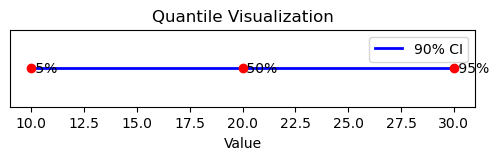

In [29]:
fig, ax = plt.subplots(figsize=(6, 1))

# Plot horizontal line between q5 and q95
ax.plot([q5, q95], [0, 0], color='b', linestyle='-', linewidth=2, label="90% CI")

# Plot individual points
ax.scatter([q5, q50, q95], [0, 0, 0], color='r', zorder=3)

# Labels
ax.set_yticks([])  # Remove y-axis
ax.set_xlabel("Value")
ax.set_title("Quantile Visualization")

# Annotate quantiles
ax.text(q5, 0, " 5%", verticalalignment='center', fontsize=10, color='black')
ax.text(q50, 0, " 50%", verticalalignment='center', fontsize=10, color='black')
ax.text(q95, 0, " 95%", verticalalignment='center', fontsize=10, color='black')

plt.legend()
plt.show()


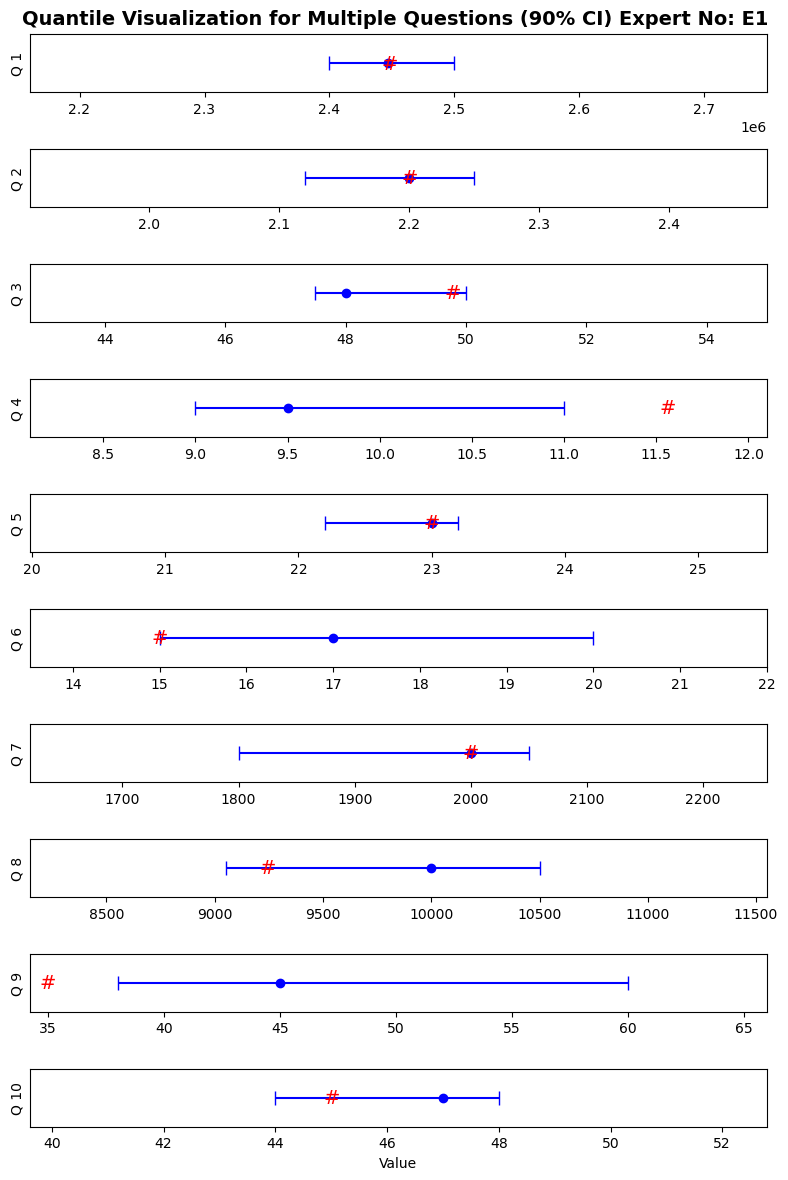

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for 10 variables (each with 5%, 50%, 95% quantiles)
num_q = 10
variables = [f"Q {i+1}" for i in range(num_q)]
realization = df2["REALIZATION"][:10]

# Generate example quantiles
np.random.seed(42)  # For reproducibility
# q5 = np.random.randint(5, 15, num_vars)   # 5th percentile
# q5 = np.array([float(x) for x in df.iloc[-1][4::3][:]], dtype=float)
q5 = df.iloc[-1][4::3].to_numpy(dtype=float)
# q50 = np.random.randint(15, 25, num_vars) # 50th percentile (median)
q50 = df.iloc[-1][5::3].to_numpy(dtype=float)
# q95 = np.random.randint(25, 35, num_vars) # 95th percentile
q95 = df.iloc[-1][6::3].to_numpy(dtype=float)

# Compute error values for error bars
lower_errors = q50 - q5
upper_errors = q95 - q50

# Plotting multiple axes with independent scales
fig, axes = plt.subplots(num_q, 1, figsize=(8, 12), sharex=False)  # Separate y-axes

# Add a title to the whole figure
fig.suptitle("Quantile Visualization for Multiple Questions (90% CI) Expert No: E1", fontsize=14, fontweight="bold")

fig.gca().spines.values()
# spine.set_edgecolor("black")
# spine.set_linewidth(2)


for i, ax in enumerate(axes):
    ax.errorbar(q50[i], 0, xerr=[[lower_errors[i]], [upper_errors[i]]], fmt='o', color='b', capsize=5, label="90% CI")
    ax.text(realization[i], 0, "#", fontsize=14, color='red', ha='center', va='center')
    # ax.set_title(variables[i], fontsize=10)
    ax.set_ylabel(variables[i], fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlim(q5[i] - .1*q5[i], q95[i] + .1*q95[i])  # Independent x-axis limits for each variable

# Adjust layout
plt.xlabel("Value")
# plt.title("Expert No: E1")
plt.tight_layout()
plt.savefig("figure1.png", dpi=300, bbox_inches='tight')
plt.show()

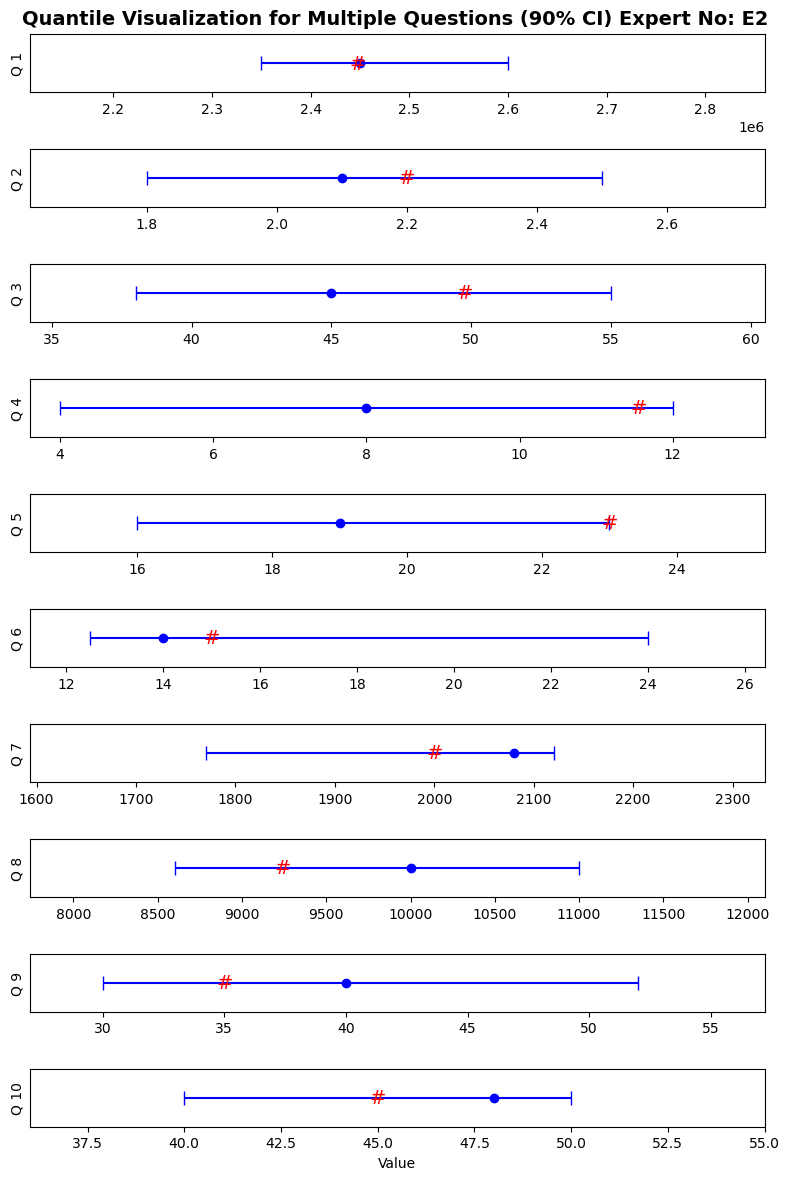

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for 10 variables (each with 5%, 50%, 95% quantiles)
num_q = 10
variables = [f"Q {i+1}" for i in range(num_q)]
realization = df2["REALIZATION"][:10]

# Generate example quantiles
np.random.seed(42)  # For reproducibility
# q5 = np.random.randint(5, 15, num_vars)   # 5th percentile
# q5 = np.array([float(x) for x in df.iloc[-1][4::3][:]], dtype=float)
q5 = df.iloc[-2][4::3].to_numpy(dtype=float)
# q50 = np.random.randint(15, 25, num_vars) # 50th percentile (median)
q50 = df.iloc[-2][5::3].to_numpy(dtype=float)
# q95 = np.random.randint(25, 35, num_vars) # 95th percentile
q95 = df.iloc[-2][6::3].to_numpy(dtype=float)

# Compute error values for error bars
lower_errors = q50 - q5
upper_errors = q95 - q50

# Plotting multiple axes with independent scales
fig, axes = plt.subplots(num_q, 1, figsize=(8, 12), sharex=False)  # Separate y-axes

# Add a title to the whole figure
fig.suptitle("Quantile Visualization for Multiple Questions (90% CI) Expert No: E2", fontsize=14, fontweight="bold")

fig.gca().spines.values()
# spine.set_edgecolor("black")
# spine.set_linewidth(2)


for i, ax in enumerate(axes):
    ax.errorbar(q50[i], 0, xerr=[[lower_errors[i]], [upper_errors[i]]], fmt='o', color='b', capsize=5, label="90% CI")
    ax.text(realization[i], 0, "#", fontsize=14, color='red', ha='center', va='center')
    # ax.set_title(variables[i], fontsize=10)
    ax.set_ylabel(variables[i], fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlim(q5[i] - .1*q5[i], q95[i] + .1*q95[i])  # Independent x-axis limits for each variable

# Adjust layout
plt.xlabel("Value")
# plt.title("Expert No: E1")
plt.tight_layout()
plt.savefig("figure2.png", dpi=300, bbox_inches='tight')
plt.show()

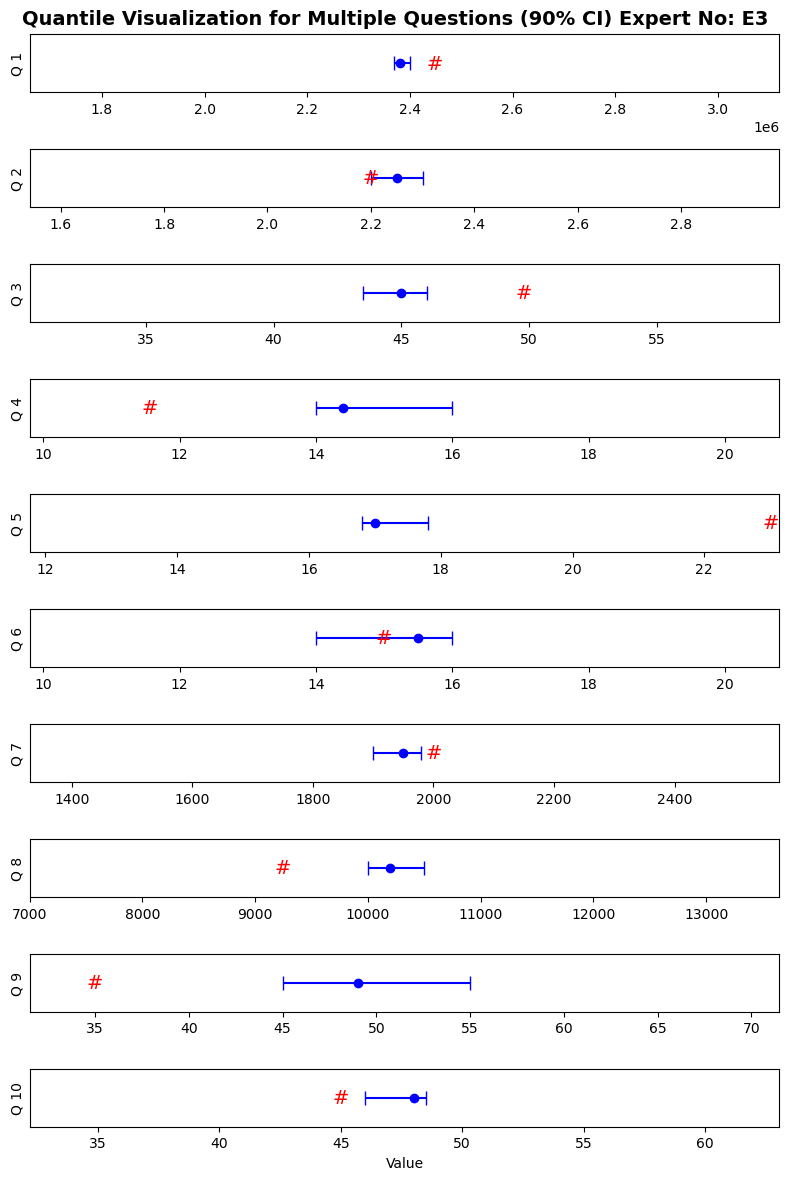

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for 10 variables (each with 5%, 50%, 95% quantiles)
num_q = 10
variables = [f"Q {i+1}" for i in range(num_q)]
realization = df2["REALIZATION"][:10]

# Generate example quantiles
np.random.seed(42)  # For reproducibility
# q5 = np.random.randint(5, 15, num_vars)   # 5th percentile
# q5 = np.array([float(x) for x in df.iloc[-1][4::3][:]], dtype=float)
q5 = df.iloc[-3][4::3].to_numpy(dtype=float)
# q50 = np.random.randint(15, 25, num_vars) # 50th percentile (median)
q50 = df.iloc[-3][5::3].to_numpy(dtype=float)
# q95 = np.random.randint(25, 35, num_vars) # 95th percentile
q95 = df.iloc[-3][6::3].to_numpy(dtype=float)

# Compute error values for error bars
lower_errors = q50 - q5
upper_errors = q95 - q50

# Plotting multiple axes with independent scales
fig, axes = plt.subplots(num_q, 1, figsize=(8, 12), sharex=False)  # Separate y-axes

# Add a title to the whole figure
fig.suptitle("Quantile Visualization for Multiple Questions (90% CI) Expert No: E3", fontsize=14, fontweight="bold")

fig.gca().spines.values()
# spine.set_edgecolor("black")
# spine.set_linewidth(2)


for i, ax in enumerate(axes):
    ax.errorbar(q50[i], 0, xerr=[[lower_errors[i]], [upper_errors[i]]], fmt='o', color='b', capsize=5, label="90% CI")
    ax.text(realization[i], 0, "#", fontsize=14, color='red', ha='center', va='center')
    # ax.set_title(variables[i], fontsize=10)
    ax.set_ylabel(variables[i], fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlim(q5[i] - .3*q5[i], q95[i] + .3*q95[i])  # Independent x-axis limits for each variable

# Adjust layout
plt.xlabel("Value")
# plt.title("Expert No: E1")
plt.tight_layout()
plt.savefig("figure3.png", dpi=300, bbox_inches='tight')
plt.show()